In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
from PIL import ImageEnhance

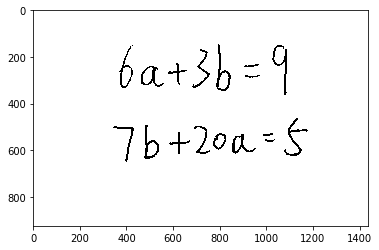

In [2]:
image = cv2.imread('test_image/98.jpg')
grey_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,grey_image = cv2.threshold(grey_image,127,255,cv2.THRESH_BINARY_INV)
#grey_image = np.array(Image.fromarray(grey_image).resize((320,190)))
plt.imshow(grey_image,'Greys')

In [3]:
print(grey_image.shape)

(925, 1436)


26
17


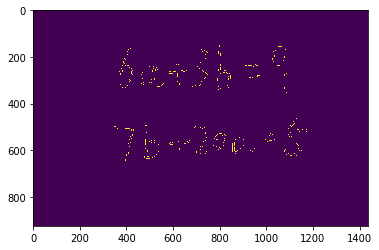

In [4]:
img,contours,hierarchy= cv2.findContours(grey_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
x_lenth = grey_image.shape[0]
y_lenth = grey_image.shape[1]
temp_image = np.zeros((x_lenth,y_lenth))
contour = contours
temp_contours = [ [] * 1 for i in range(len(hierarchy[0]))]
for index in range(len(hierarchy[0])):
    father = hierarchy[0][index][3]
    if len(contours[index]) < 50:
        hierarchy[0][index][3] = 0
    for cont1 in contours[index]:
        temp_contours[index].append([cont1[0][0],cont1[0][1]])
    if father!=-1:
        for cont1 in contours[index]:
            temp_contours[father].append([cont1[0][0],cont1[0][1]])
        temp_contours[index] = []
deal_contours = []
for index in range(len(hierarchy[0])):
    father = hierarchy[0][index][3]
    if father == -1:
        deal_contours.append(temp_contours[index])
print(len(temp_contours))
print(len(deal_contours))
deal_contours = deal_contours
# for index_1 in temp_contours:
#     for index_2 in index_1:
#         x = index_2[0]
#         y = index_2[1]
#         temp_image[y][x]=255
for index_1 in deal_contours:
    for index2 in index_1:
        x = index2[0]
        y = index2[1]
        temp_image[y][x]=255
plt.imshow(temp_image)
# cv2.imshow('asfa',temp_image)
# cv2.waitKey(0)
# cv2.destroyWindow()

In [5]:
x_min = y_lenth
y_min = x_lenth
x_max = 0
y_max = 0
print(x_min,y_min)
def pxCulate(com):
    x_min = com[0][0]
    y_min = com[0][1]
    return x_min
deal_contours.sort(key = pxCulate)
this_contours = deal_contours[1]
for con in this_contours:
    x,y = con
    if x < x_min:
        x_min = x
    if y < y_min:
        y_min = y
    if x > x_max:
        x_max = x
    if y > y_max:
        y_max = y

1436 925


In [6]:
after_contour = np.array(this_contours)-[x_min,y_min]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
189


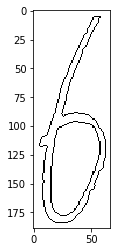

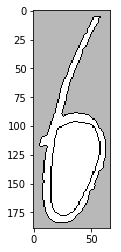

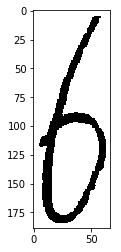

In [7]:
lable_image = np.array(Image.new('L',(x_max-x_min+10,y_max-y_min+10)))

print(lable_image)
for index in after_contour:
    x = index[0]+5
    y = index[1]+5
    lable_image[y][x]=255
plt.figure()
plt.imshow(lable_image,'Greys')
mask = np.zeros([lable_image.shape[0]+2, lable_image.shape[1]+2], np.uint8)
copy_image = lable_image
cv2.floodFill(copy_image, mask,(0,0), (99 , 0, 0), cv2.FLOODFILL_MASK_ONLY)
plt.figure()
plt.imshow(copy_image,'Greys')
def find_point(read_image):
    print(read_image.shape[0])
    y = int(read_image.shape[0]/2)
    light_flage = False
    frist_falge = False
    black_flage = False
    find_x = -1
    find_y = -1
    for i in range(int(read_image.shape[1])):
        if light_flage == False and read_image[y][i] == 255:
            light_flage = True
        elif light_flage == True and frist_falge == False and read_image[y][i] == 0:
            black_flage = True
            frist_falge = True
            find_x = i
            find_y = y
        elif light_flage == True and black_flage == True and read_image[y][i] == 255:
            return find_x,find_y
    return 0,0
cv2.floodFill(copy_image, mask,find_point(copy_image), (255 , 255, 255), cv2.FLOODFILL_MASK_ONLY)
_,copy_image = cv2.threshold(copy_image,127,255,cv2.THRESH_BINARY)

plt.figure()
plt.imshow(copy_image,'Greys')

In [8]:
print(copy_image[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
x_lenth = grey_image.shape[0]
y_lenth = grey_image.shape[1]
temp_image = np.zeros((x_lenth,y_lenth))
label_list = []

def find_label_list_index(key):
    label_index = -1
    for i in label_list:
        label_index+=1
        for j in i:
            if j==key:
                return label_index
    return -1
cout = 0
label = 1
def find_parent(pos_x,pos_y,label):
    direction = [[0,1],[0,-1],[-1,0],[1,0],[-1,-1],[1,1],[1,-1],[-1,1]]
    new_label = label
    is_new = True
    find_list = [label]
    for dr in direction:
        new_x = pos_x + dr[0]
        new_y = pos_y + dr[1]
        if new_x >= 0 and new_y >=0 and new_x < x_lenth and new_y < y_lenth:
            if temp_image[new_x][new_y] != 0:
                is_new = False
            if temp_image[new_x][new_y] < label and temp_image[new_x][new_y] != 0:
                find_list.append(temp_image[new_x][new_y])
                new_label = temp_image[new_x][new_y]
    global cout
    find_list.sort()
    if is_new == True:
        find_index = find_label_list_index(new_label)
        if find_index == -1:
            label_list.append([new_label])
    if is_new == False:
        find_index = find_label_list_index(new_label)
        if find_label_list_index(new_label) == -1:
            label_list[find_index].append(new_label)
    return new_label,is_new
for x in range(x_lenth):
    for y in range(y_lenth):
        if grey_image[x][y] == 0:
            new_label,is_new = find_parent(x,y,label)
            temp_image[x][y] = new_label
            if is_new == True:
                label+=1
for x in range(x_lenth):
    for y in range(y_lenth):
        if temp_image[x][y]!=0:
            item_label = find_label_list_index(temp_image[x][y])+1
            temp_image[x][y] = item_label
            cout+=1

KeyboardInterrupt: 

In [ ]:
label_list

In [ ]:
plt.imshow(temp_image,'Greys')